# Stacking

### Importing the data

In [1]:
# @hidden_cell
from io import StringIO
import requests
import json
import pandas as pd
import numpy as np

# This function accesses a file in your Object Storage. The definition contains your credentials.
# You might want to remove those credentials before you share your notebook.
def get_object_storage_file_with_credentials_4ce2b21ebf484e98948d2c0b81b8b84f(container, filename):
    """This functions returns a StringIO object containing
    the file content from Bluemix Object Storage V3."""

    url1 = ''.join(['https://identity.open.softlayer.com', '/v3/auth/tokens'])
    data = {'auth': {'identity': {'methods': ['password'],
            'password': {'user': {'name': 'admin_c24f02ccead8f3d4baea656ecbccd8e6e38d474d','domain': {'id': '8d5c5723b93e4bdf8c5be53de58a2395'},
            'password': 'D!~GY/p7Z]b##1oV'}}}}}
    headers1 = {'Content-Type': 'application/json'}
    resp1 = requests.post(url=url1, data=json.dumps(data), headers=headers1)
    resp1_body = resp1.json()
    for e1 in resp1_body['token']['catalog']:
        if(e1['type']=='object-store'):
            for e2 in e1['endpoints']:
                        if(e2['interface']=='public'and e2['region']=='dallas'):
                            url2 = ''.join([e2['url'],'/', container, '/', filename])
    s_subject_token = resp1.headers['x-subject-token']
    headers2 = {'X-Auth-Token': s_subject_token, 'accept': 'application/json'}
    resp2 = requests.get(url=url2, headers=headers2)
    return StringIO(resp2.text)

data_train = pd.read_csv(get_object_storage_file_with_credentials_4ce2b21ebf484e98948d2c0b81b8b84f('seminaire_data', 'Transformed_features.csv'), index_col=False)
data_train.head()

,Unnamed: 0,installer_f,installer_fnr,extraction_type_f,extraction_type_fnr,source_f,source_fnr,waterpoint_type_group_f,waterpoint_type_group_fnr,management_f,...,scheme_management_fnr,lga_f,lga_fnr,basin_f,basin_fnr,amount_tsh,permit,age_pump,public_meeting,target
0,0,0.606383,0.074468,0.599253,0.100859,0.622290,0.074966,0.576491,0.083986,0.504234,...,0.063436,0.774823,0.019504,0.653687,0.049164,6000.0,0,36,1,0
1,1,0.846154,NaN,0.599253,0.100859,0.603922,0.136819,0.576491,0.083986,0.599540,...,0.028721,0.592179,0.037709,0.497658,0.096507,0.0,1,47,-1,0
2,2,0.654412,0.132353,0.599253,0.100859,0.385671,0.036585,0.576491,0.083986,0.504234,...,0.063436,0.581169,0.016234,0.600895,0.053356,25.0,1,46,1,0
3,3,0.536036,0.040541,0.551217,0.047649,0.489571,0.044334,0.576491,0.083986,0.504234,...,0.063436,0.265823,NaN,0.371689,0.072557,0.0,1,23,1,2
4,4,0.555556,0.044444,0.599253,0.100859,0.603922,0.136819,0.576491,0.083986,0.598341,...,NaN,0.530480,0.058366,0.497658,0.096507,0.0,1,-1,1,0


### Preparing the data (normalization, splitting train and test ... )

In [2]:
data_train = data_train.iloc[:, 1:]

In [3]:
data_train.head()

,installer_f,installer_fnr,extraction_type_f,extraction_type_fnr,source_f,source_fnr,waterpoint_type_group_f,waterpoint_type_group_fnr,management_f,management_fnr,...,scheme_management_fnr,lga_f,lga_fnr,basin_f,basin_fnr,amount_tsh,permit,age_pump,public_meeting,target
0,0.606383,0.074468,0.599253,0.100859,0.622290,0.074966,0.576491,0.083986,0.504234,0.068902,...,0.063436,0.774823,0.019504,0.653687,0.049164,6000.0,0,36,1,0
1,0.846154,NaN,0.599253,0.100859,0.603922,0.136819,0.576491,0.083986,0.599540,0.099002,...,0.028721,0.592179,0.037709,0.497658,0.096507,0.0,1,47,-1,0
2,0.654412,0.132353,0.599253,0.100859,0.385671,0.036585,0.576491,0.083986,0.504234,0.068902,...,0.063436,0.581169,0.016234,0.600895,0.053356,25.0,1,46,1,0
3,0.536036,0.040541,0.551217,0.047649,0.489571,0.044334,0.576491,0.083986,0.504234,0.068902,...,0.063436,0.265823,NaN,0.371689,0.072557,0.0,1,23,1,2
4,0.555556,0.044444,0.599253,0.100859,0.603922,0.136819,0.576491,0.083986,0.598341,0.065166,...,NaN,0.530480,0.058366,0.497658,0.096507,0.0,1,-1,1,0


In [4]:
# Transforming the data into numpy arrays

Y = (data_train.target).tolist()
y = np.asarray(Y)

In [5]:
# Dropping the y column and the time column

data_train.drop('target', axis=1, inplace=True)

In [6]:
# Transforming the data frame into an array

X = data_train.as_matrix()
X.shape

# First we fill the Nan values with the mean (first approach)

X = np.where(np.isnan(X), np.ma.array(X, mask = np.isnan(X)).mean(axis=0), X)

In [7]:
# Scale features
X -= np.mean(X, axis=0)
X /= np.std(X, axis=0)

#Splitting the data into training and test sets (60% training of the first layer, 30% for training the second layer, 10% for testing )

L = np.arange(X.shape[0])
np.random.shuffle(L)
ind_train_1 = L[:int(0.6*X.shape[0])]
ind_train_2 = L[int(0.6*X.shape[0]):int(0.9*X.shape[0])]
ind_test = L[int(0.9*X.shape[0]):]

### Principle behind stacking

Stacking is an ensembling method that is very popular in machine learning. Many Kaggle competitions' winners relied on it to build their models. The idea behind stacking is that instead of building a learner or a set of learners, we build layers of learners. We have a first set of learners which features we have engineered previously, and which parameters have already been learnt. Then the features for the next layer of learners are the predictions of the first layer on the dataset, and the outputs the second layer is exactly the output of our task (classification, regression, ...).

To sum it up, stacking is learning layers of models which feed their output as features for the next layer, which is, in turn, fitted to predict the same output (the output of the task at hand). It has empirically been observed that it improves on the performance of the best model of the first layer. There may be some information leak-out (which can lead to overfitting) if the same data that was used to train the first layer, is used in the next layers. To avoid this, there is a form of stacking called 'blending', in which the dataset is split into subsets, one subset for each layer of stacking, and a final subset for testing. 

### Learning the various models we'll use in our stacking

Here, we used a two-layers stacking, with 60% of the data used for training the first layer of models, and 30% used to train the next layer, with 10% left for testing.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier as gbc
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.linear_model import LogisticRegression as logreg
from sklearn.svm import SVC

#Training a gradient boosting machine
depths = range(3,7)
precisions_gbc = np.zeros(4)
list_gbc = []

for k in xrange(4):
    print(k)
    classifier = gbc(loss='deviance',max_depth=depths[k])
    classifier.fit(X[ind_train_1],y[ind_train_1])
    list_gbc.append(classifier)
    pred = classifier.predict(X[ind_train_2])
    precisions_gbc[k] = np.mean((pred==y[ind_train_2]))
    
GBM = list_gbc[np.argmax(precisions_gbc)]
    
#Training a random forest
forests = []
precisions_rf = []
estimators = range(5,20)
variables = range(3,9)
depths = range(3,9)
for estimator in estimators:
    print(estimator)
    for var in variables:
        for depth in depths:
            classifier = rfc(n_estimators = estimator, max_features = var, max_depth = depth)
            classifier.fit(X[ind_train_1],y[ind_train_1])
            pred = classifier.predict(X[ind_train_2])
            precisions_rf.append(np.mean((pred==y[ind_train_2])))
            forests.append(classifier)

RF = forests[np.argmax(precisions_rf)]
     
#Training logistic regression
data_log = np.array([(X[:,i]-np.mean(X[:,i]))/np.std(X[:,i]) for i in xrange(X.shape[1])]).transpose()
logregs = []
precisions_log = []
L2_penalties = [10**k for k in xrange(-4,5,1)]
for L2 in L2_penalties:
    print(L2)
    classifier = logreg(penalty = "l1",C= L2**(-1),multi_class="ovr")
    classifier.fit(data_log[ind_train_1],y[ind_train_1])
    pred = classifier.predict(data_log[ind_train_2])
    precisions_log.append(np.mean((pred==y[ind_train_2])))
    logregs.append(classifier)

log2 = logregs[np.argmax(precisions_log)]
               
#Training SVM with gaussian kernel
data_svm = np.array([(X[:,i]-np.mean(X[:,i]))/np.std(X[:,i]) for i in xrange(X.shape[1])]).transpose()


classifier = SVC(C=100., gamma = 10.,kernel='rbf',decision_function_shape='ovr')
classifier.fit(data_svm[ind_train_1],y[ind_train_1])
pred = classifier.predict(data_svm[ind_train_2])
print(np.mean((pred==y[ind_train_2])))
svm = classifier

0
1
2
3
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0.0001
0.001
0.01
0.1
1
10
100
1000
10000
0.728787878788


### Doing the actual stacking

In [ ]:
#Building the training set and testing sets for the second layer
data = X
Class = y

features = [GBM.predict(data[ind_train_2]), RF.predict(data[ind_train_2]), log2.predict(data_log[ind_train_2]),svm.predict(data_svm[ind_train_2])]
features = np.array(features).transpose()

test_features = [GBM.predict(data[ind_test]), RF.predict(data[ind_test]), log2.predict(data_log[ind_test]),svm.predict(data_svm[ind_test])]
test_features = np.array(test_features).transpose()

#Usign the gradient boosting forest as the stacker model
depths_stacking = range(2,5)
stacks = []
precisions = []

for k in depths_stacking:
    print k
    classifier = gbc(loss='deviance',max_depth=k)
    classifier.fit(features,Class[ind_train_2])
    pred = classifier.predict(test_features)
    stacks.append(classifier)
    precisions.append(np.mean((pred==Class[ind_test])))

stacker = stacks[np.argmax(precisions)]
    
#Making the submission file
sub = pd.read_csv("Transformed_features_submission.csv",index_col=0)
sub = np.array(sub.fillna(0.))

features_sub = [GBM.predict(sub), RF.predict(sub), log2.predict(sub),svm.predict(sub)]
features_sub = np.array(features_sub).transpose()
pred_sub = stacker.predict(features_sub)

test_class = list(pred_sub)
class_dict = {0:"functional",1:"functional needs repair",2:"non functional"}
out = [class_dict[test_class[k]] for k in xrange(len(test_class))]

#submit = pd.read_csv("SubmissionFormat.csv",index_col=0)
#submit["status_group"] = out
#submit.to_csv("submission_stacking.csv",sep=",")

2
3
4


### Histograms of the accuracy for the various models

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline
score_gbc = []
score_rf = []
score_log = []
score_stack = []

data = X
Class = y

for i in xrange(10):
    print(i)
    L = np.arange(X.shape[0])
    np.random.shuffle(L)
    ind_train_1 = L[:int(0.6*X.shape[0])]
    ind_train_2 = L[int(0.6*X.shape[0]):int(0.9*X.shape[0])]
    ind_test = L[int(0.9*X.shape[0]):]
    
    #Training a gradient boosting machine
    depths = range(3,7)
    precisions_gbc = np.zeros(4)
    list_gbc = []

    for k in xrange(4):
        classifier = gbc(loss='deviance',max_depth=depths[k])
        classifier.fit(data[ind_train_1],Class[ind_train_1])
        list_gbc.append(classifier)
        pred = classifier.predict(data[ind_train_2])
        precisions_gbc[k] = np.mean((pred==Class[ind_train_2]))

    GBM = list_gbc[np.argmax(precisions_gbc)]

    #Training a random forest
    forests = []
    precisions_rf = []
    estimators = range(5,20)
    variables = range(3,9)
    depths = range(3,9)
    for estimator in estimators:
        for var in variables:
            for depth in depths:
                classifier = rfc(n_estimators = estimator, max_features = var, max_depth = depth)
                classifier.fit(data[ind_train_1],Class[ind_train_1])
                pred = classifier.predict(data[ind_train_2])
                precisions_rf.append(np.mean((pred==Class[ind_train_2])))
                forests.append(classifier)

    RF = forests[np.argmax(precisions_rf)]

    #Training logistic regression
    data_log = np.array([(data[:,i]-np.mean(data[:,i]))/np.std(data[:,i]) for i in xrange(data.shape[1])]).transpose()
    logregs = []
    precisions_log = []
    L2_penalties = [10**k for k in xrange(-4,5,1)]
    for L2 in L2_penalties:
        classifier = logreg(penalty = "l2",C= L2,multi_class="ovr")
        classifier.fit(data_log[ind_train_1],Class[ind_train_1])
        pred = classifier.predict(data[ind_train_2])
        precisions_log.append(np.mean((pred==Class[ind_train_2])))
        logregs.append(classifier)

    log2 = logregs[np.argmax(precisions_log)]
    
    #Building the training set and testing sets for the second layer
    features = [GBM.predict(data[ind_train_2]), RF.predict(data[ind_train_2]), log2.predict(data_log[ind_train_2])]
    features = np.array(features).transpose()

    test_features = [GBM.predict(data[ind_test]), RF.predict(data[ind_test]), log2.predict(data_log[ind_test])]
    test_features = np.array(test_features).transpose()

    #Usign the gradient boosting forest as the stacker model
    depths_stacking = range(2,5)
    stacks = []
    precisions = []

    for k in depths_stacking:
        classifier = gbc(loss='deviance',max_depth=k)
        classifier.fit(features,Class[ind_train_2])
        pred = classifier.predict(test_features)
        stacks.append(classifier)
        precisions.append(np.mean((pred==Class[ind_test])))

    stacker = stacks[np.argmax(precisions)]

    #Making the submission file
    sub = pd.read_csv("Transformed_features_submission.csv",index_col=0)
    sub = np.array(sub.fillna(0.))

    score_stack.append(np.max(precisions))
    
    pred_gbm = GBM.predict(data[ind_test])
    score_gbc.append(np.mean(pred_gbm==Class[ind_test]))
    
    pred_rf = RF.predict(data[ind_test])
    score_rf.append(np.mean(pred_rf==Class[ind_test]))
    
    pred_log = log2.predict(data_log[ind_test])
    score_log.append(np.mean(pred_log==Class[ind_test]))


0
1
2
3
4
5
6
7
8
9


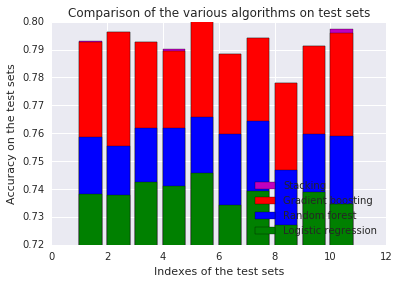

In [12]:
import matplotlib.pyplot as plt
% matplotlib inline
plt.figure()
plt.bar(range(1,1+len(score_stack)), score_stack, label= "Stacking", color = "m")
plt.bar(range(1,1+len(score_gbc)), score_gbc, label = "Gradient boosting",color = 'r')
plt.bar(range(1,1+len(score_rf)), score_rf, label = "Random forest",color = 'b')
plt.bar(range(1,1+len(score_log)), score_log, label = "Logistic regression",color = 'g')
plt.ylim([0.72,0.8])
plt.ylabel("Accuracy on the test sets")
plt.xlabel("Indexes of the test sets")
plt.legend(loc=4)
plt.title("Comparison of the various algorithms on test sets")
plt.show()

## Other representation : Boxplot with seaborn

In [13]:
# Summary of scores 

data = pd.DataFrame.from_dict(
    {'Logistic Regression' : score_log,
     'Random Forest' : score_rf,
     'Gradient Boosting' : score_gbc,
     'Stacking' : score_stack
    })



In [17]:
scores = score_stack + score_gbc + score_rf + score_log
legend = ["Stacking" for i in score_stack] + ["Gradient Boosting" for i in score_stack] + ["Random Forest" for i in score_stack] + ["Log Reg" for i in score_stack]
data_boxplot = pd.DataFrame.from_dict({'Scores' : scores, 'Algorithms' : legend})

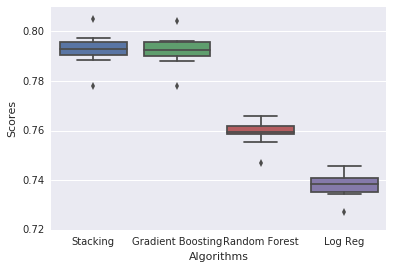

In [18]:
sns.boxplot(x = 'Algorithms', y = 'Scores', data = data_boxplot)